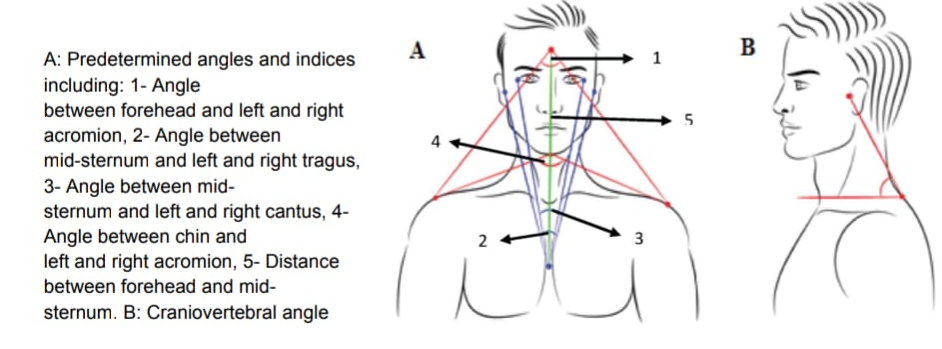
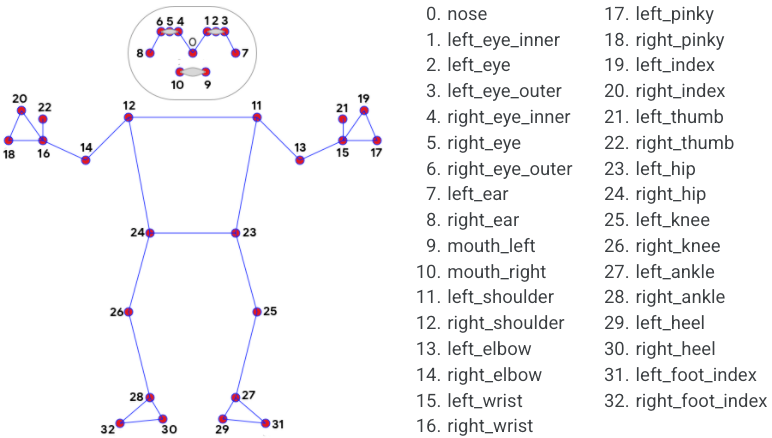

In [12]:
import cv2
import time
import math as m
import mediapipe as mp


# Calculate distance
def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return dist


# Calculate angle.
def findAngle(x1, y1, x2, y2):
    theta = m.acos((y2 - y1) * (-y1) / (m.sqrt(
        (x2 - x1) ** 2 + (y2 - y1) ** 2) * y1))
    degree = int(180 / m.pi) * theta
    return degree


"""
Function to send alert. Use this function to send alert when bad posture detected.
Feel free to get creative and customize as per your convenience.
"""


def sendWarning():
    print("Wrong posture detected ")


# =============================CONSTANTS and INITIALIZATIONS=====================================#
# Initilize frame counters.
good_frames = 0
bad_frames = 0

# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX

# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)

# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
# ===============================================================================================#


if __name__ == "__main__":

    cap = cv2.VideoCapture(0)


    while cap.isOpened():
        # Capture frames.
        success, image = cap.read()
        if not success:
            print("Null.Frames")
            break
        # Get fps.
        fps = cap.get(cv2.CAP_PROP_FPS)
        # Get height and width.
        
        h, w = image.shape[:2]
        # Convert the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Process the image.
        keypoints = pose.process(image)

        # Convert the image back to BGR.
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Use lm and lmPose as representative of the following methods.
        try:
        
            lm = keypoints.pose_landmarks
            # print(lm)
            lmPose = mp_pose.PoseLandmark
    
            # Acquire the landmark coordinates.
            
            # Once aligned properly, left or right should not be a concern.
            # Left shoulder
            l_shldr_x = int(lm.landmark[lmPose.LEFT_SHOULDER].x * w)
            l_shldr_y = int(lm.landmark[lmPose.LEFT_SHOULDER].y * h)
    
            # Right shoulder
            r_shldr_x = int(lm.landmark[lmPose.RIGHT_SHOULDER].x * w)
            r_shldr_y = int(lm.landmark[lmPose.RIGHT_SHOULDER].y * h)
            # Left ear.
            l_ear_x = int(lm.landmark[lmPose.LEFT_EAR].x * w)
            l_ear_y = int(lm.landmark[lmPose.LEFT_EAR].y * h)
            # Left hip.
            l_hip_x = int(lm.landmark[lmPose.LEFT_HIP].x * w)
            l_hip_y = int(lm.landmark[lmPose.LEFT_HIP].y * h)
    
            # Calculate distance between left shoulder and right shoulder points.
            # offset = findDistance(l_shldr_x, l_shldr_y, r_shldr_x, r_shldr_y)
    
            # # Assist to align the camera to point at the side view of the person.
            # # Offset threshold 30 is based on results obtained from analysis over 100 samples.
            # if offset < 100:
            #     cv2.putText(image, str(int(offset)) + ' Aligned',
            #                 (400, 30), font, 0.9, green, 2)
            # else:
            #     cv2.putText(image, str(int(offset)) + ' Not Aligned',
            #                 (400, 30), font, 0.9, red, 2)

        except:
            pass


        # Calculate angles.
        neck_inclination = findAngle(l_shldr_x, l_shldr_y, l_ear_x, l_ear_y)
        torso_inclination = findAngle(l_hip_x, l_hip_y, l_shldr_x, l_shldr_y)

        # Draw landmarks.
        cv2.circle(image, (l_shldr_x, l_shldr_y), 7, yellow, -1)
        cv2.circle(image, (l_ear_x, l_ear_y), 7, yellow, -1)

        # Let's take y - coordinate of P3 100px above x1,  for display elegance.
        # Although we are taking y = 0 while calculating angle between P1,P2,P3.
        cv2.circle(image, (l_shldr_x, l_shldr_y - 100), 7, yellow, -1)
        cv2.circle(image, (r_shldr_x, r_shldr_y), 7, pink, -1)
        cv2.circle(image, (l_hip_x, l_hip_y), 7, yellow, -1)

        # Similarly, here we are taking y - coordinate 100px above x1. Note that
        # you can take any value for y, not necessarily 100 or 200 pixels.
        cv2.circle(image, (l_hip_x, l_hip_y - 100), 7, yellow, -1)

        # Put text, Posture and angle inclination.
        # Text string for display.
        angle_text_string = 'Neck : ' + \
            str(int(neck_inclination)) 

        # Determine whether good posture or bad posture.
        # The threshold angles have been set based on intuition.
        if neck_inclination < 30:
            bad_frames = 0
            good_frames += 1
        # if neck_inclination < 40 and torso_inclination < 10:
        #     bad_frames = 0
        #     good_frames += 1

            cv2.putText(image, angle_text_string, (10, 30),
                        font, 0.9, light_green, 2)
            cv2.putText(image, str(int(neck_inclination)),
                        (l_shldr_x + 10, l_shldr_y), font, 0.9, light_green, 2)
            cv2.putText(image, str(int(torso_inclination)),
                        (l_hip_x + 10, l_hip_y), font, 0.9, light_green, 2)

            # Join landmarks.
            cv2.line(image, (l_shldr_x, l_shldr_y),
                     (l_ear_x, l_ear_y), green, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y),
                     (l_shldr_x, l_shldr_y - 100), green, 4)
            cv2.line(image, (l_hip_x, l_hip_y),
                     (l_shldr_x, l_shldr_y), green, 4)
            cv2.line(image, (l_hip_x, l_hip_y),
                     (l_hip_x, l_hip_y - 100), green, 4)

        else:
            good_frames = 0
            bad_frames += 1

            cv2.putText(image, angle_text_string, (10, 30), font, 0.9, red, 2)
            cv2.putText(image, str(int(neck_inclination)),
                        (l_shldr_x + 10, l_shldr_y), font, 0.9, red, 2)
            cv2.putText(image, str(int(torso_inclination)),
                        (l_hip_x + 10, l_hip_y), font, 0.9, red, 2)

            # Join landmarks.
            cv2.line(image, (l_shldr_x, l_shldr_y), (l_ear_x, l_ear_y), red, 4)
            cv2.line(image, (l_shldr_x, l_shldr_y),
                     (l_shldr_x, l_shldr_y - 100), red, 4)
            cv2.line(image, (l_hip_x, l_hip_y), (l_shldr_x, l_shldr_y), red, 4)
            cv2.line(image, (l_hip_x, l_hip_y),
                     (l_hip_x, l_hip_y - 100), red, 4)

        # Calculate the time of remaining in a particular posture.
        good_time = (1 / fps) * good_frames
        bad_time = (1 / fps) * bad_frames

        # Pose time.
        if good_time > 0:
            time_string_good = 'Good Posture Time : ' + \
                str(round(good_time, 1)) + 's'
            cv2.putText(image, time_string_good,
                        (10, h - 20), font, 0.9, green, 2)
        else:
            time_string_bad = 'Bad Posture Time : ' + \
                str(round(bad_time, 1)) + 's'
            cv2.putText(image, time_string_bad,
                        (10, h - 20), font, 0.9, red, 2)

        # If you stay in bad posture for more than 3 minutes (180s) send an alert.
        if bad_time > 20:
            sendWarning()

        # Display.
        cv2.imshow('Pose Correction', image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()
